In [9]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [10]:
# Reading data from 1st stock
ivv = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\IVV.csv'
vap = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VAP.csv'
vso = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VSO.csv'
vas = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week4_31052021\Assignment\VAS.csv'

ivv_df = pd.read_csv(ivv, infer_datetime_format=True, parse_dates=True, index_col='Date')
ivv_drop_df = ivv_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
ivv_drop_df.columns = ['IVV']
ivv_drop_df.drop_duplicates(inplace=True)
ivv_drop_df.index = ivv_drop_df.index.normalize()
ivv_final_df = ivv_drop_df.loc['2015-01-01':'2018-12-30']
ivv_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  if sys.path[0] == '':


,IVV
Date,
2015-02-01,206.73
2015-05-01,203.10
2015-06-01,201.27
2015-07-01,203.76
2015-08-01,207.40


In [11]:
# Reading data from 2nd stock
vap_df = pd.read_csv(vap, infer_datetime_format=True, parse_dates=True, index_col='Date')
vap_drop_df = vap_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vap_drop_df.columns = ['VAP']
vap_drop_df.drop_duplicates(inplace=True)
vap_drop_df.index = vap_drop_df.index.normalize()
vap_final_df = vap_drop_df.loc['2015-01-01':'2018-12-30']
vap_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


,VAP
Date,
2015-02-01,69.31
2015-05-01,69.75
2015-06-01,69.20
2015-07-01,70.03
2015-08-01,70.76


In [12]:
vso_df = pd.read_csv(vso, infer_datetime_format=True, parse_dates=True, index_col='Date')
vso_drop_df = vso_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vso_drop_df.columns = ['VSO']
vso_drop_df.drop_duplicates(inplace=True)
vso_drop_df.index = vso_drop_df.index.normalize()
vso_final_df = vso_drop_df.loc['2015-01-01':'2018-12-30']
vso_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,VSO
Date,
2015-02-01,43.04
2015-05-01,43.17
2015-06-01,42.33
2015-07-01,42.10
2015-08-01,42.55


In [13]:
# Reading data from 4th stock
vas_df = pd.read_csv(vas, infer_datetime_format=True, parse_dates=True, index_col='Date')
vas_drop_df = vas_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
vas_drop_df.columns = ['VAS']
vas_drop_df.drop_duplicates(inplace=True)
vas_drop_df.index = vas_drop_df.index.normalize()
vas_drop_df.loc['2015-01-01':'2018-12-30']
vas_final_df = vas_drop_df.loc['2015-01-01':'2018-12-30']
vas_final_df.head()

C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys
C:\Users\TribThapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,VAS
Date,
2015-02-01,68.65
2015-06-01,67.78
2015-07-01,67.69
2015-08-01,67.91
2015-09-01,69.29


In [18]:
def analyse_my_stock_portfolio2(stocks, weighting):
    
    combined_stock_df = pd.DataFrame(stocks[0])
    
    for i in range(1,len(stocks)):
        
        combined_stock_df = pd.concat([combined_stock_df, stocks[i]], axis='columns', join='inner')
        
    print()
    print(f"This is your combined stock portfolio:\n {combined_stock_df}")
    print()
    daily_returns = combined_stock_df.pct_change()
    
    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = daily_returns.dropna()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    portfolio_return = daily_returns.dot(weighting[0:])
    portfolio_cum_return = (1+portfolio_return).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################

    fig = plt.figure(figsize=(30, 20))    
    gs = GridSpec(100, 3, figure=fig)
    ax1 = plt.subplot(gs[0:10, :])
    ax2 = plt.subplot(gs[15:25, :])
    ax3 = plt.subplot(gs[30:40, :])                        
    ax4 = plt.subplot(gs[45:65, :])                        
    ax5 = plt.subplot(gs[70:90, :])                        

    # Plot daily returns
    plot1 = daily_returns.plot(title='Daily returns', ax=ax1)
    plot1.legend([daily_returns.columns[0], daily_returns.columns[1], daily_returns.columns[2], daily_returns.columns[3]])
    plot1.set_xlabel("")

    # Plot cumulative returns
    plot2 = portfolio_cum_return.plot(ax=ax2, title='Cumulative Returns')
    plot2.set_xlabel("")

    #Plot 21-day rolling std dev
    plot3 = roll_std.plot(figsize=(30, 20), title='Rolling 21-day standard deviation', ax=ax3)
    plot3.set_xlabel(" ")

    #Plot correlation
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)      
    sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=ax4, mask=mask)

    #Plot Sharpe Ratio
    sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', ax=ax5)

    #fig.savefig('Summary.png')

    plt.show()


This is your combined stock portfolio:
                IVV    VAP    VSO    VAS
Date                                   
2015-02-01  206.73  69.31  43.04  68.65
2015-06-01  201.27  69.20  42.33  67.78
2015-07-01  203.76  70.03  42.10  67.69
2015-08-01  207.40  70.76  42.55  67.91
2015-09-01  205.65  71.29  43.07  69.29
...            ...    ...    ...    ...
2018-11-19  271.13  77.92  53.34  72.70
2018-06-12  271.82  80.64  52.21  72.15
2018-07-12  265.60  81.38  52.10  72.52
2018-12-12  267.49  81.53  51.48  72.04
2018-12-17  255.65  80.96  52.20  72.21

[384 rows x 4 columns]


These are your daily returns:
                  IVV       VAP       VSO       VAS
Date                                              
2015-06-01 -0.026411 -0.001587 -0.016496 -0.012673
2015-07-01  0.012371  0.011994 -0.005433 -0.001328
2015-08-01  0.017864  0.010424  0.010689  0.003250
2015-09-01 -0.008438  0.007490  0.012221  0.020321
2015-12-01 -0.007586 -0.005050 -0.005572 -0.010824
...              ...     

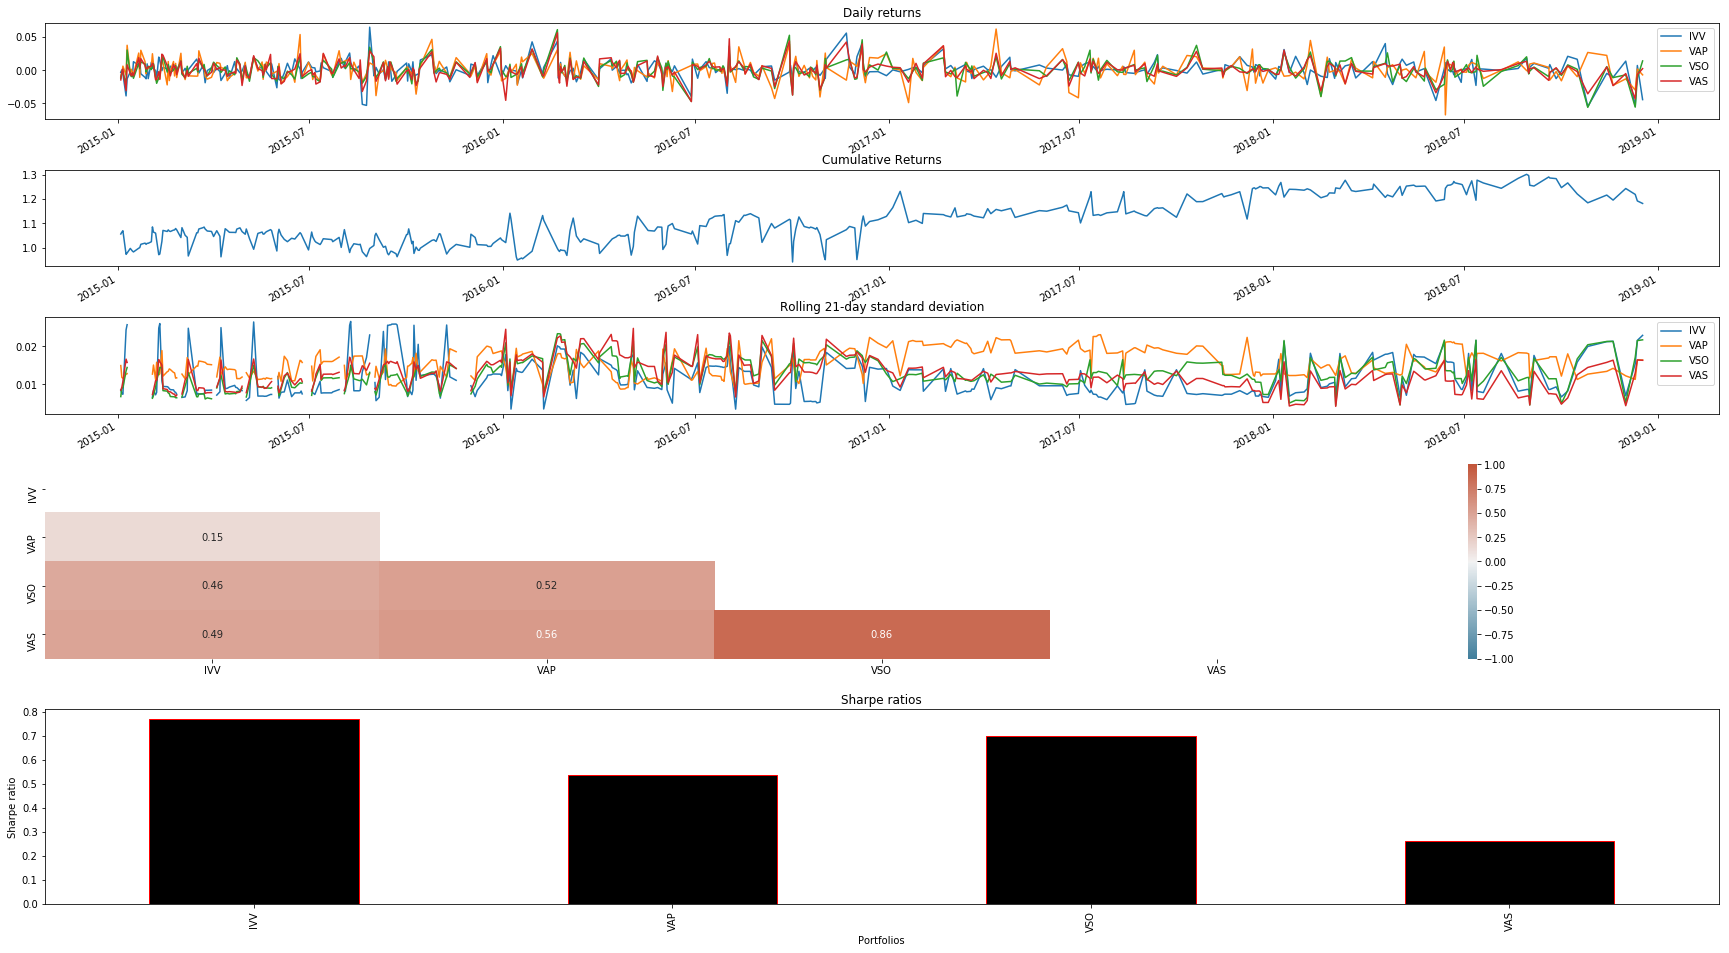

In [19]:
stocks = [ivv_final_df, vap_final_df, vso_final_df, vas_final_df]
weight = [0.25, 0.25, 0.25, 0.25]

analyse_my_stock_portfolio2(stocks, weight)

In [ ]:
def analyse_my_stock_portfolio(stocks, weighting):

        
    combined_stock_df = pd.concat([stocks[0], stocks[1], stocks[2], stocks[3]], axis='columns', join='inner')
    print()
    print(f"This is your combined stock portfolio:\n {combined_stock_df}")
    print()
    daily_returns = combined_stock_df.pct_change()
    
    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = daily_returns.dropna()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    portfolio_return = daily_returns.dot(weighting[0:])
    portfolio_cum_return = (1+portfolio_return).cumprod()  
                
    #Calc 21-day rolling std dev
    roll_std_0 = daily_returns.iloc[:, 0].rolling(window=21).std()
    roll_std_1 = daily_returns.iloc[:, 1].rolling(window=21).std()
    roll_std_2 = daily_returns.iloc[:, 2].rolling(window=21).std()
    roll_std_3 = daily_returns.iloc[:, 3].rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      
    
    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      
    
    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################
    
    fig = plt.figure(figsize=(30, 20))    
    gs = GridSpec(80, 3, figure=fig)
    ax1 = plt.subplot(gs[0:10, :])
    ax2 = plt.subplot(gs[15:25, :])
    ax3 = plt.subplot(gs[30:40, :])                        
    ax4 = plt.subplot(gs[45:55, :])                        
    ax5 = plt.subplot(gs[60:70, :])                        
    
    # Plot daily returns
    plot1 = daily_returns.iloc[:, 0].plot(color='blue', title='Daily returns', ax=ax1)
    daily_returns.iloc[:, 1].plot(ax=plot1, color='red', alpha=0.8)
    daily_returns.iloc[:, 2].plot(ax=plot1, color='green', linestyle='dotted', alpha=0.5)
    daily_returns.iloc[:, 3].plot(ax=plot1, color='purple', linestyle='dashed', alpha=0.3)
    plot1.legend([daily_returns.columns[0], daily_returns.columns[1], daily_returns.columns[2], daily_returns.columns[3]])
    plot1.set_xlabel("")
    
    # Plot cumulative returns
    plot2 = portfolio_cum_return.plot(ax=ax2, title='Cumulative Returns')
    plot2.set_xlabel("")
    
    #Plot 21-day rolling std dev
    plot3 = roll_std_0.plot(figsize=(30, 20), title='Rolling 21-day standard deviation', color='y', ax=ax3)
    roll_std_1.plot(ax=plot3, color='r', linestyle='dotted', alpha=0.9)
    roll_std_2.plot(ax=plot3, color='g', linestyle='dashdot', alpha=0.8)
    roll_std_3.plot(ax=plot3, color='b', linestyle='dotted', alpha=0.7)
    plot3.set_xlabel(" ")

    #Plot correlation
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)      
    sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=ax4, mask=mask)
    
    #Plot Sharpe Ratio
    sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', ax=ax5)
    
    #fig.savefig('Summary.png')
    
    plt.show()


In [ ]:
def analyse_my_stock_portfolio2(stocks, weighting):
    
    combined_stock_df = pd.DataFrame(stocks[0])
    
    for i in range(1,len(stocks)):
        
        combined_stock_df = pd.concat([combined_stock_df, stocks[i]], axis='columns', join='inner')
        
    print()
    print(f"This is your combined stock portfolio:\n {combined_stock_df}")
    print()
    daily_returns = combined_stock_df.pct_change()
    
    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = daily_returns.dropna()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    portfolio_return = daily_returns.dot(weighting[0:])
    portfolio_cum_return = (1+portfolio_return).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std_0 = daily_returns.iloc[:, 0].rolling(window=21).std()
    roll_std_1 = daily_returns.iloc[:, 1].rolling(window=21).std()
    roll_std_2 = daily_returns.iloc[:, 2].rolling(window=21).std()
    roll_std_3 = daily_returns.iloc[:, 3].rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################

    fig = plt.figure(figsize=(30, 20))    
    gs = GridSpec(80, 3, figure=fig)
    ax1 = plt.subplot(gs[0:10, :])
    ax2 = plt.subplot(gs[15:25, :])
    ax3 = plt.subplot(gs[30:40, :])                        
    ax4 = plt.subplot(gs[45:55, :])                        
    ax5 = plt.subplot(gs[60:70, :])                        

    # Plot daily returns
    plot1 = daily_returns.iloc[:, 0].plot(color='blue', title='Daily returns', ax=ax1)
    daily_returns.iloc[:, 1].plot(ax=plot1, color='red', alpha=0.8)
    daily_returns.iloc[:, 2].plot(ax=plot1, color='green', linestyle='dotted', alpha=0.5)
    daily_returns.iloc[:, 3].plot(ax=plot1, color='purple', linestyle='dashed', alpha=0.3)
    plot1.legend([daily_returns.columns[0], daily_returns.columns[1], daily_returns.columns[2], daily_returns.columns[3]])
    plot1.set_xlabel("")

    # Plot cumulative returns
    plot2 = portfolio_cum_return.plot(ax=ax2, title='Cumulative Returns')
    plot2.set_xlabel("")

    #Plot 21-day rolling std dev
    plot3 = roll_std_0.plot(figsize=(30, 20), title='Rolling 21-day standard deviation', color='y', ax=ax3)
    roll_std_1.plot(ax=plot3, color='r', linestyle='dotted', alpha=0.9)
    roll_std_2.plot(ax=plot3, color='g', linestyle='dashdot', alpha=0.8)
    roll_std_3.plot(ax=plot3, color='b', linestyle='dotted', alpha=0.7)
    plot3.set_xlabel(" ")

    #Plot correlation
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)      
    sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=ax4, mask=mask)

    #Plot Sharpe Ratio
    sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', ax=ax5)

    #fig.savefig('Summary.png')

    plt.show()